# Tarea 2

Miguel Raz y Claudio Pierard

1) Consideren la función

\begin{equation}
z_{n+1} = z_n^2 + c, 
\end{equation}

con `c = 0.12256484161600012 - 0.74486407104im`. Definan una malla de valores iniciales $z_0$ en el intervalo $[-1,1]\times [-1,1]$ (parte real $\times$ parte imaginaria).

- ¿Cuantos valores finitos distintos (en el intervalo $[-1,1]\times [-1,1]$) se pueden obtener después de un gran número de iteraciones?

- Usando un color distinto para cada uno, grafiquen en el plano $\textrm{Re}(z) - \textrm{Im}(z)$ el conjunto obtenido.

2) Usando la función `compute_roots` vista en clase, o en alguna variación propuesta por ustedes, definan (en Julia) el mapeo

\begin{equation}
x_{n+1} = B(x_{n}) = 2x_n \mod 1.
\end{equation}

- Obtengas los puntos fijos de este mapeo numéricamente. Los puntos fijos del mapeo son aquéllos que se mapean en si mismos, es decir, $x_{n} = B(x_{n})$. Este cálculo se puede hacer a mano, lo que debe usarse para comprobar que la implementación numérica funciona bien.

- Pensando en que la estabilidad de un punto fijo es el comportamiento que se observa de los iterados (a priori un número infinito) al considerar pequeñas desviaciones del punto fijo, ¿cuál es la estabilidad de los puntos fijos que se obtiene *numéricamente*, digamos, después de 100 iteraciones? ¿Pueden encontrar una explicación analítica de la observación numérica?

*Hint: Sean imaginos y no se conformen*

#### Pregunta 1
Haciendo la malla de condiciones iniciales:

In [2]:
using PyPlot

In [3]:
function initial_conditions(rango)
    
    imaginarios = collect(rango)
    reales = collect(rango)
    
    Z_initial = complex(zeros(length(rango), length(rango)))
    
    for j in 1 : length(rango)
        for i in 1 : length(rango)
            
            Z_initial[i,j] = complex(reales[i], imaginarios[j])
            
        end
    end
    
    Z_initial
    
end

initial_conditions (generic function with 1 method)

In [4]:
function interator(f, X0, n)
    
    for t in 1:n
        for j in 1:length(X0[:,1])
            for i in 1:length(X0[1,:])
                
                X0[i,j] = f(X0[i,j])
                
            end
        end
    end
    
    X0
    
end

interator (generic function with 1 method)

In [5]:
f(z) = z^2 + (0.12256484161600012 - 0.74486407104im)

f (generic function with 1 method)

In [26]:
Z1 = initial_conditions(-1:1/512:1)
Zf = interator(f, Z1, 20)

1025x1025 Array{Complex{Float64},2}:
 NaN+NaN*im  NaN+NaN*im  NaN+NaN*im  …  NaN+NaN*im  NaN+NaN*im  NaN+NaN*im
 NaN+NaN*im  NaN+NaN*im  NaN+NaN*im     NaN+NaN*im  NaN+NaN*im  NaN+NaN*im
 NaN+NaN*im  NaN+NaN*im  NaN+NaN*im     NaN+NaN*im  NaN+NaN*im  NaN+NaN*im
 NaN+NaN*im  NaN+NaN*im  NaN+NaN*im     NaN+NaN*im  NaN+NaN*im  NaN+NaN*im
 NaN+NaN*im  NaN+NaN*im  NaN+NaN*im     NaN+NaN*im  NaN+NaN*im  NaN+NaN*im
 NaN+NaN*im  NaN+NaN*im  NaN+NaN*im  …  NaN+NaN*im  NaN+NaN*im  NaN+NaN*im
 NaN+NaN*im  NaN+NaN*im  NaN+NaN*im     NaN+NaN*im  NaN+NaN*im  NaN+NaN*im
 NaN+NaN*im  NaN+NaN*im  NaN+NaN*im     NaN+NaN*im  NaN+NaN*im  NaN+NaN*im
 NaN+NaN*im  NaN+NaN*im  NaN+NaN*im     NaN+NaN*im  NaN+NaN*im  NaN+NaN*im
 NaN+NaN*im  NaN+NaN*im  NaN+NaN*im     NaN+NaN*im  NaN+NaN*im  NaN+NaN*im
 NaN+NaN*im  NaN+NaN*im  NaN+NaN*im  …  NaN+NaN*im  NaN+NaN*im  NaN+NaN*im
 NaN+NaN*im  NaN+NaN*im  NaN+NaN*im     NaN+NaN*im  NaN+NaN*im  NaN+NaN*im
 NaN+NaN*im  NaN+NaN*im  NaN+NaN*im     NaN+NaN*im  NaN+NaN*im 

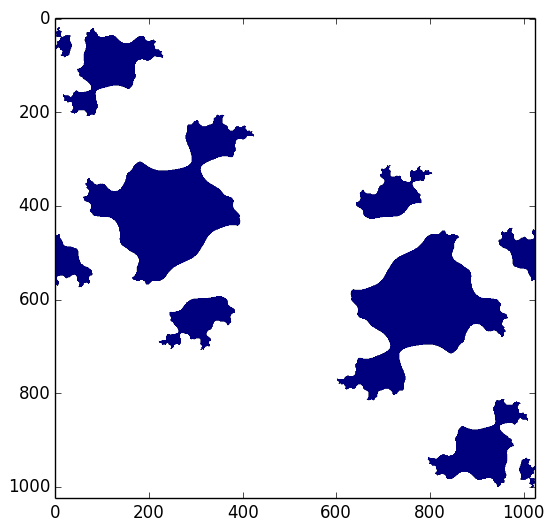

PyObject <matplotlib.image.AxesImage object at 0x3140d8610>

In [27]:
imshow(imag(Zf))

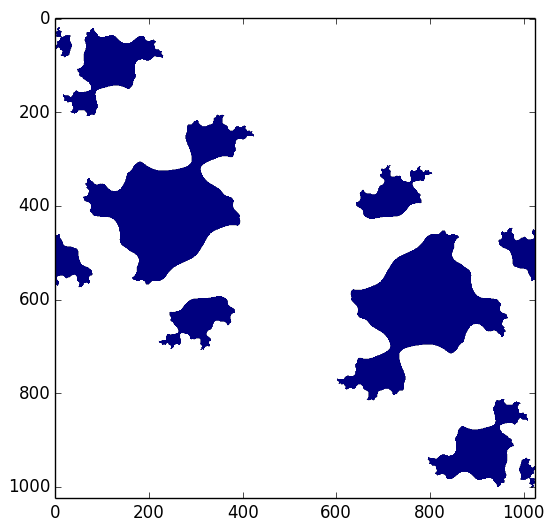

PyObject <matplotlib.image.AxesImage object at 0x30a8d8050>

In [60]:
Z_ri = real(Zf) .- imag(Zf)
imshow(Z_ri)

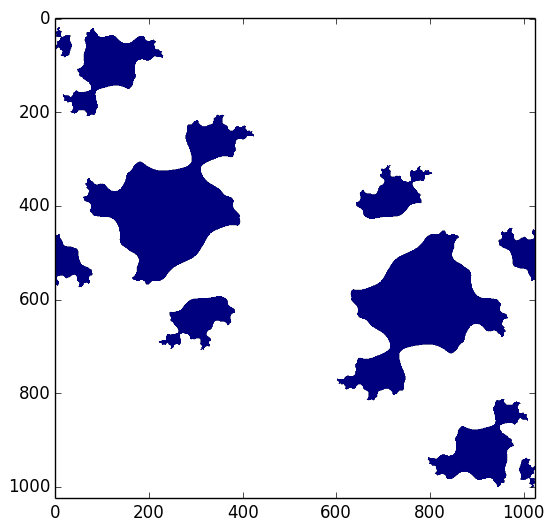

PyObject <matplotlib.image.AxesImage object at 0x32db5add0>

In [61]:
imshow(real(Zf))

**Observaciones:** Al iterar más de 10 veces la función f, con un conjunto de condiciones iniciales complejas en $[-1,1]\times [-1,1]$, todos los valores divergen. A considerar:
- Ver que la idea esté bien.
- Sólo iterarlo un número $n < 10$, antes que que diverja algún elemento de la matriz.
- Graficarlo en una escala logarítmica.

#### Pregunta 2

In [45]:
function compute_roots(f, f´, range)
    initial_conditions = range
    roots = similar(initial_conditions)

    for (j, x_0) in enumerate(initial_conditions)
        x = x_0

        # 100 iterations of Newton's method
        for i in 1:100
            x = x - f(x) / f´(x)
        end

        roots[j] = x
    end
    
    roots
end

compute_roots (generic function with 1 method)

In [52]:
3.777%1

0.7770000000000001

In [43]:
g(x) = 2x%1 #Mapeo
dg(x) = 2

dg (generic function with 1 method)

Definiendo un arreglo de condiciones iniciales:

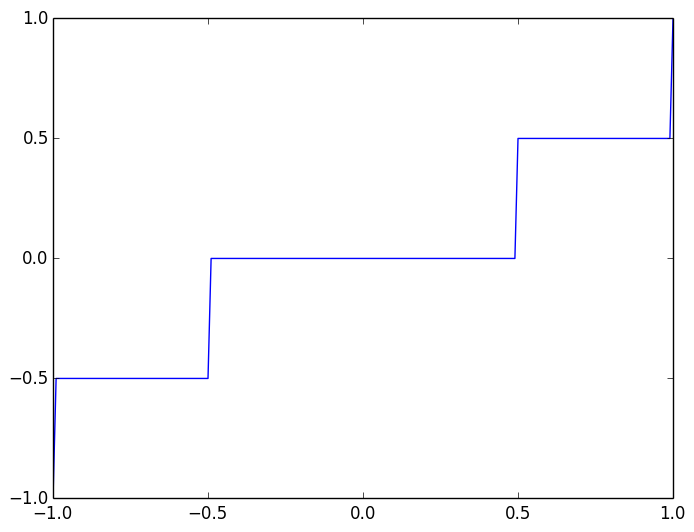

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32da32bd0>

In [59]:
mirango = -1:0.01:1
groots = compute_roots(g, dg,-1:0.01:1)
plot(mirango, groots)

In [ ]:
plot()

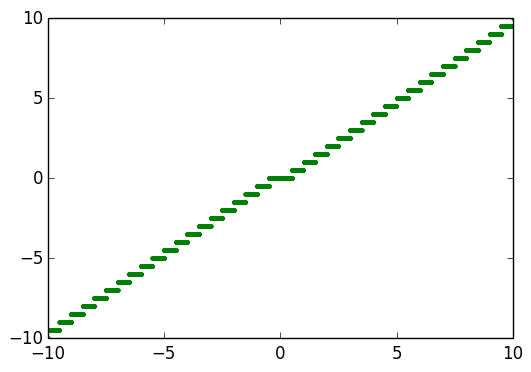

(-10,10)

In [55]:

figure(figsize=(6,4))
myrange = -10.0:1/256:10.0

plot(myrange, compute_roots( x -> g(x), x->2, myrange ), "g.")


ylim(-10,10)
xlim(-10,10)